In [1]:
import numpy as np
import matplotlib.pyplot as plt

## A. NOVA FRACTAL

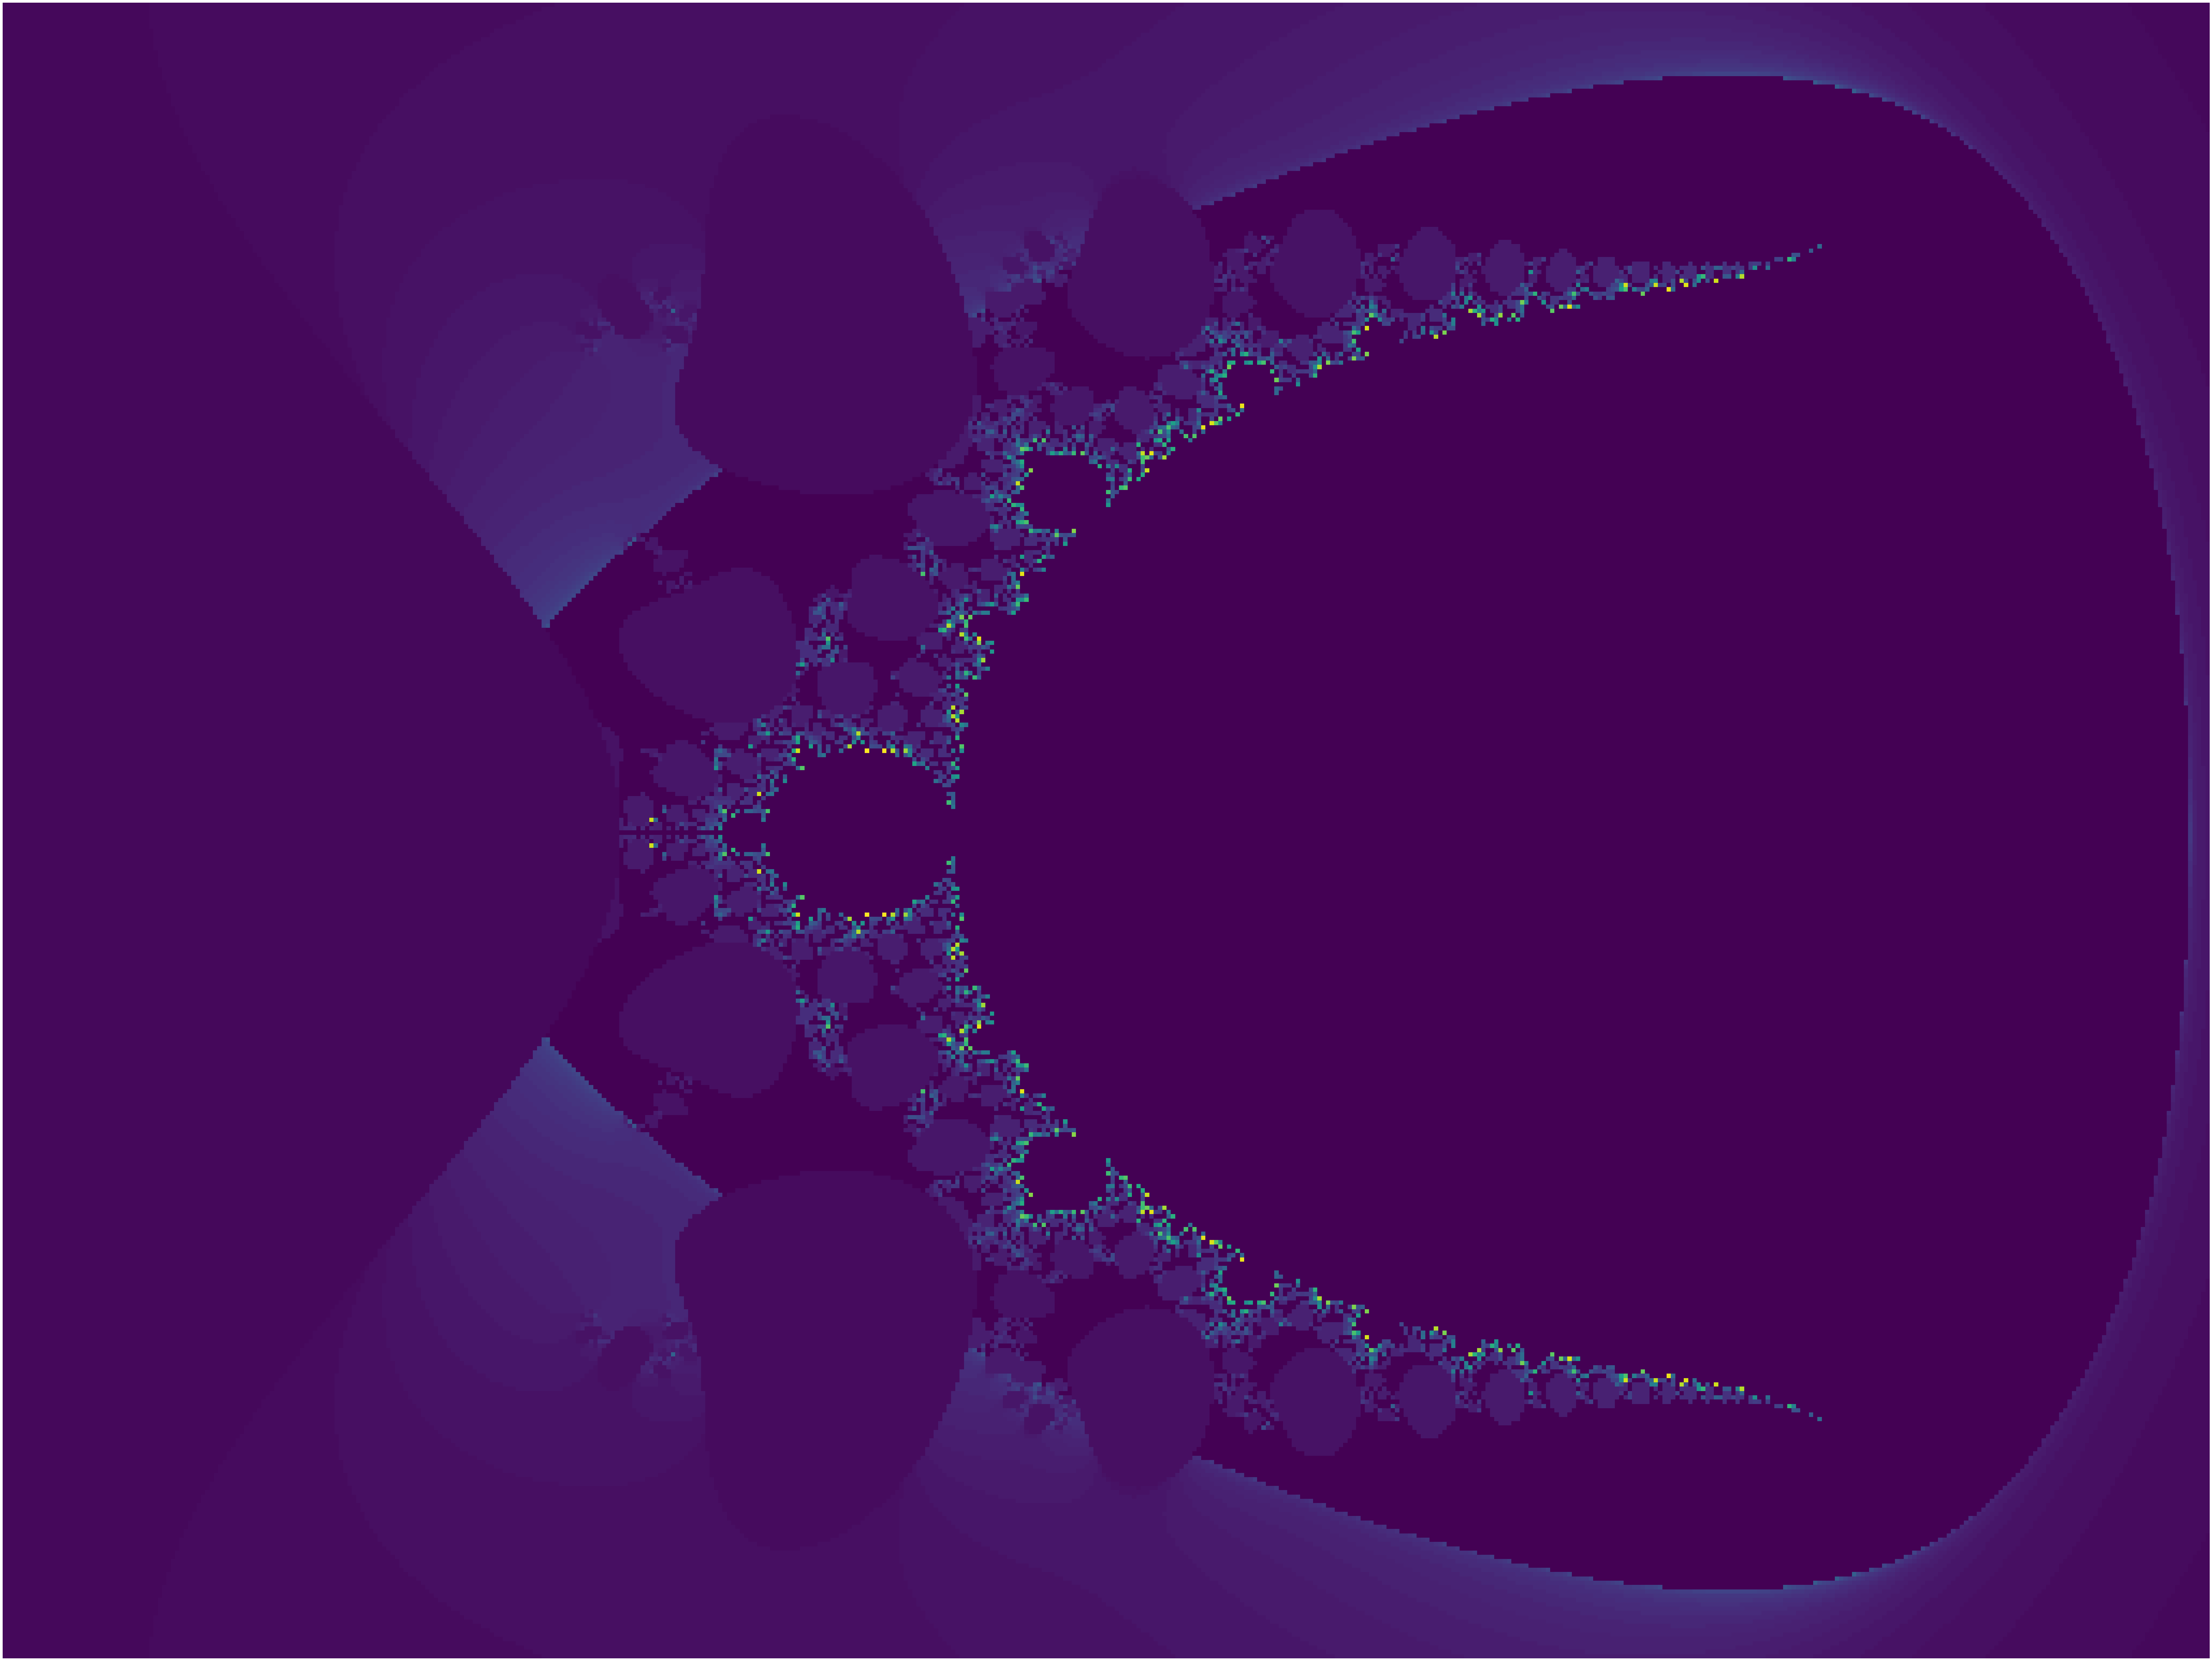

In [63]:
def nova_pt(c, max_iterations=100):
    
    iter = 0
    z = 1
    
    while (iter < max_iterations):

        # ----FRACTAL EQUATION STARTS----
        z = z - (z**3 - 1) / (3*z**2) + c
        # ----FRACTAL EQUATION ENDS  ----
        
        iter += 1
        if abs(z) > 2.0:
            break
    
    return iter if iter!=max_iterations else 0

def nova(width, height, zmin, zmax):
    
    def map_pos(i, j):
        return zmin + j*(zmax-zmin).real/width + i*(zmax-zmin).imag/height*1j
    
    return [[nova_pt(map_pos(i,j)) for j in range(width)] for i in range(height)]

(width, height) = (1024, 768)
(zmin, zmax) = (-2.2-1.5j, +1.2+1.5j)

nova = nova(int(width/2), int(height/2), zmin/2, zmax/2)

plt.figure(figsize=(128,80))
plt.axis('off')
plt.imshow(nova)

## B. MANDELBROT SET

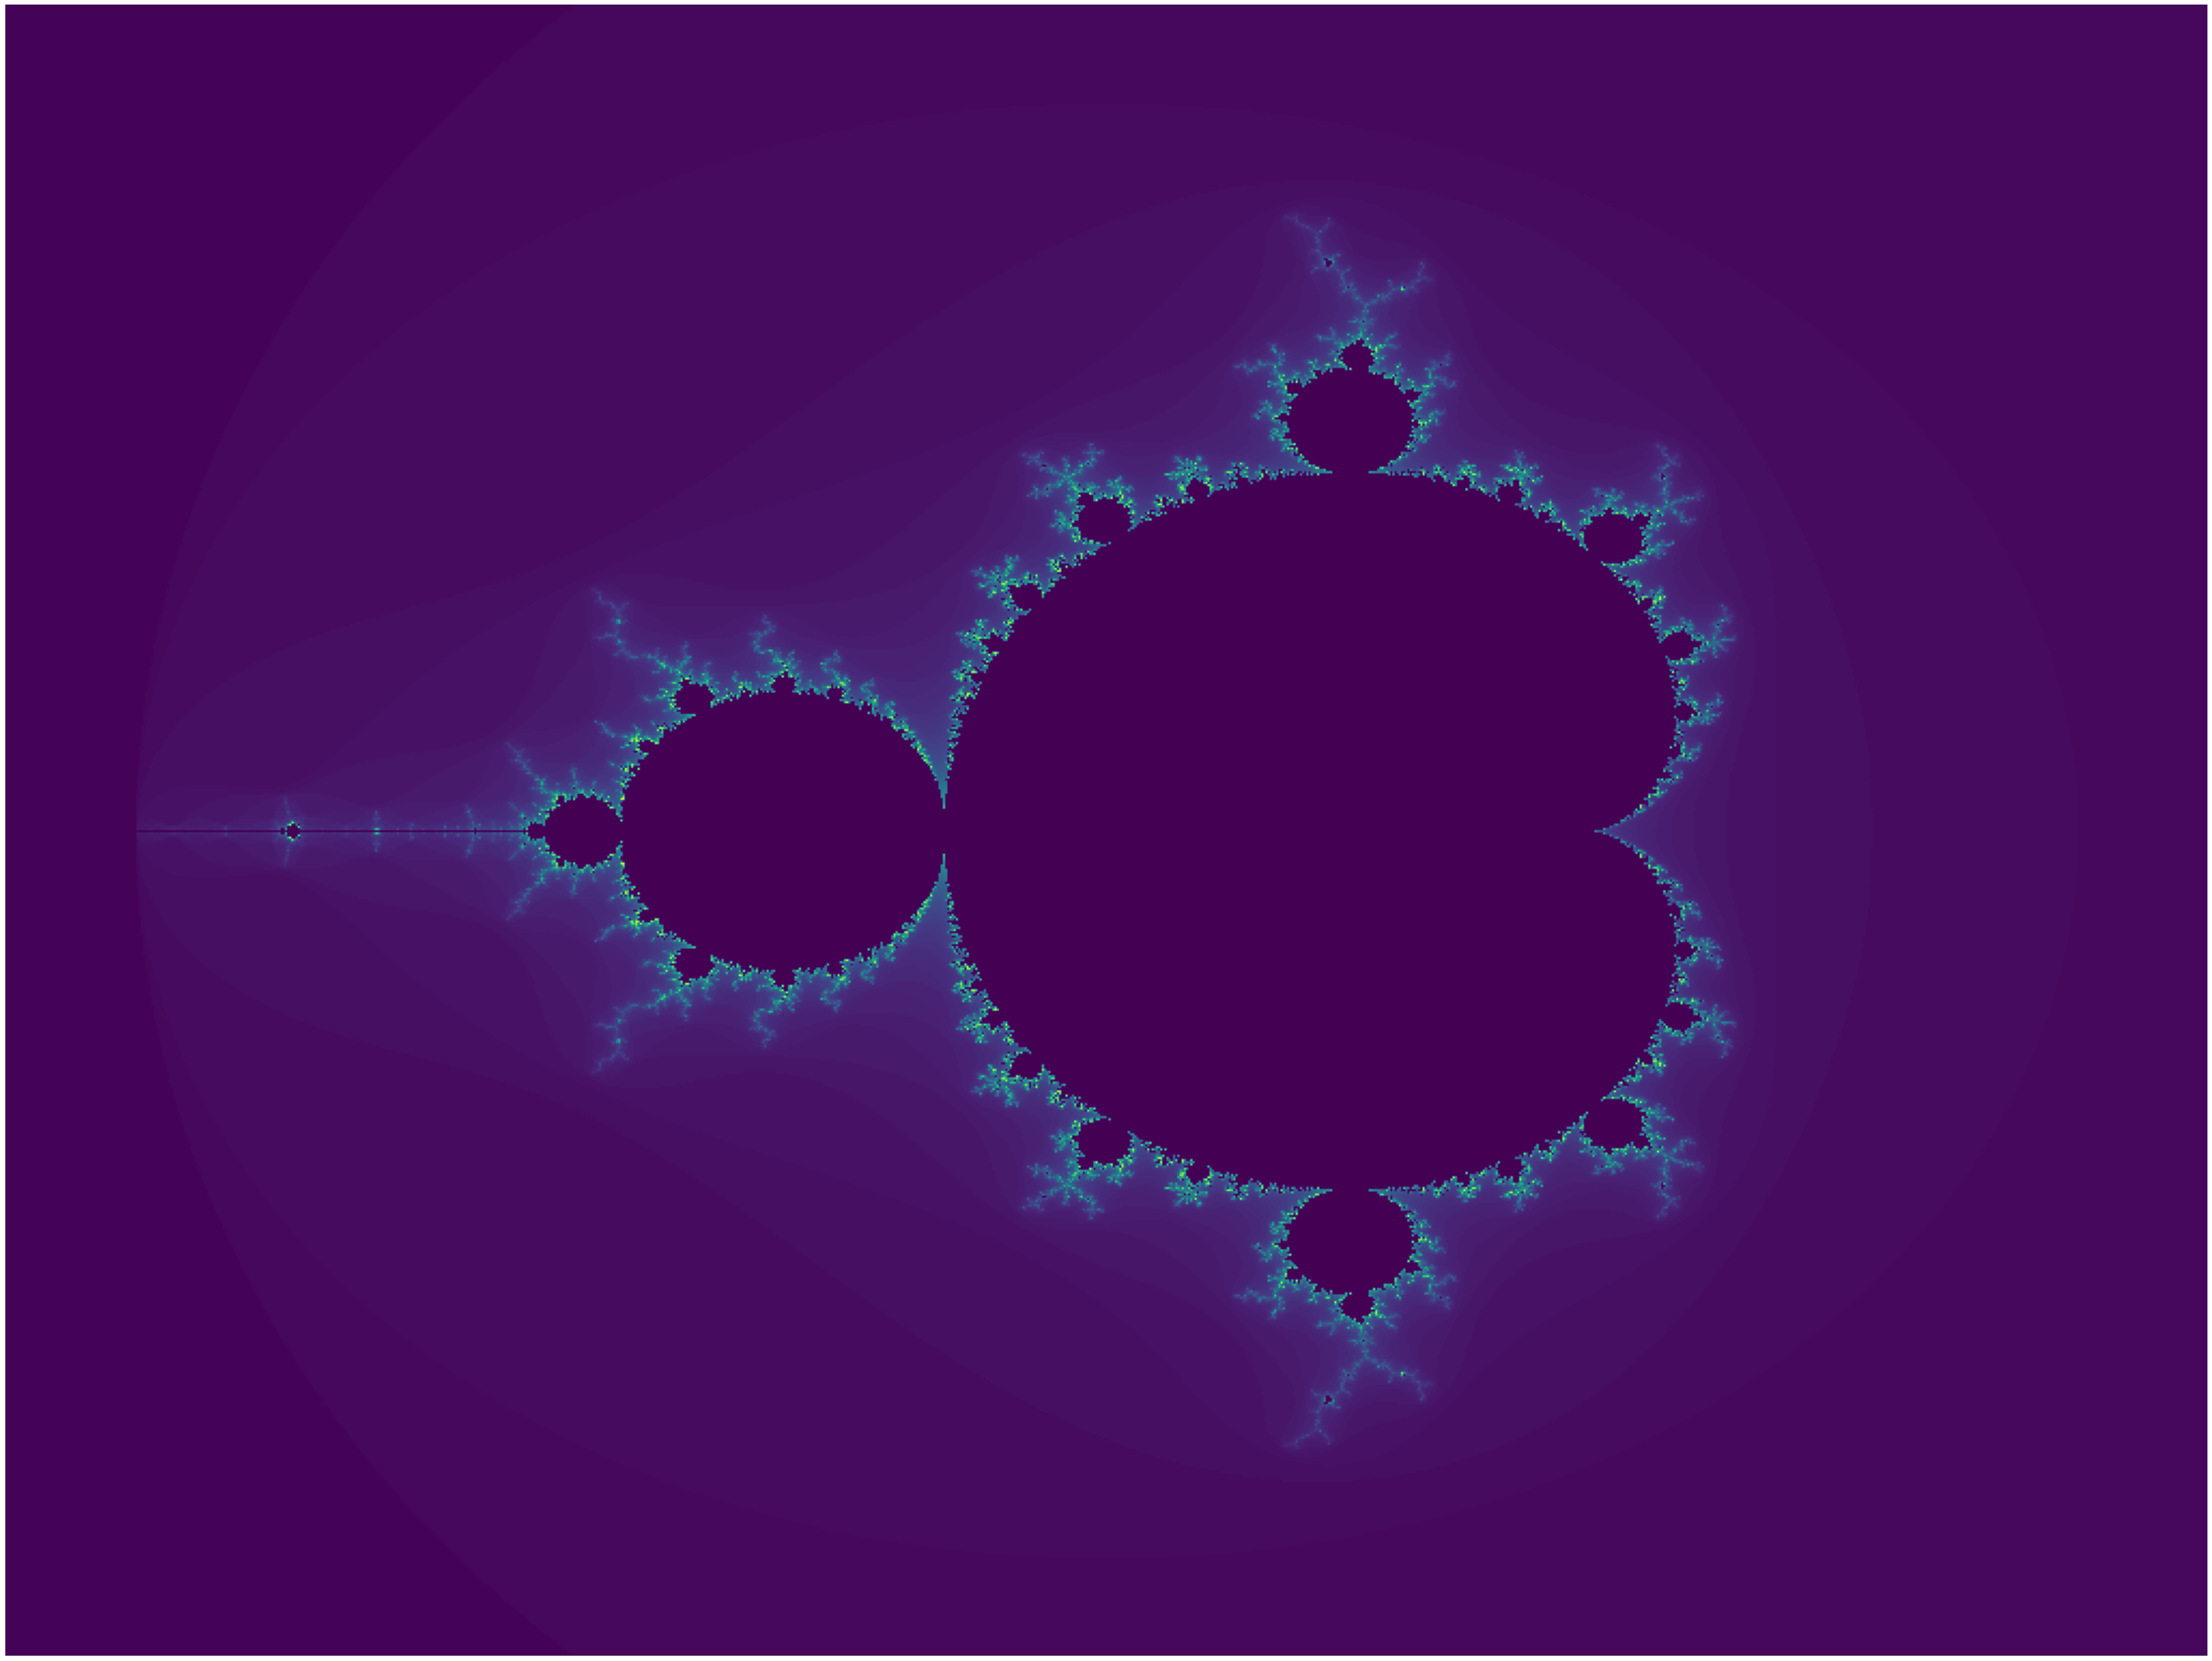

In [2]:
def mandel_pt(c, max_iterations=100):
    
    iter = 0
    z = 0
    
    while (iter < max_iterations):
        
        # ----FRACTAL EQUATION STARTS----
        z = z**2 + c
        # ----FRACTAL EQUATION ENDS  ----
        
        iter += 1
        if abs(z) > 2.0:
            break
    
    return iter if iter!=max_iterations else 0

def mandel(width, height, zmin, zmax):
    
    def map_pos(i, j):
        return zmin + j*(zmax-zmin).real/width + i*(zmax-zmin).imag/height*1j
    
    return [[mandel_pt(map_pos(i,j)) for j in range(width)] for i in range(height)]

(width, height) = (1024, 768)
(zmin, zmax) = (-2.2-1.5j, +1.2+1.5j)

mandel = mandel(width, height, zmin, zmax)

plt.figure(figsize=(64,40))
plt.axis('off')
plt.imshow(mandel)

## APPENDIX 1: THE DICK FRACTAL

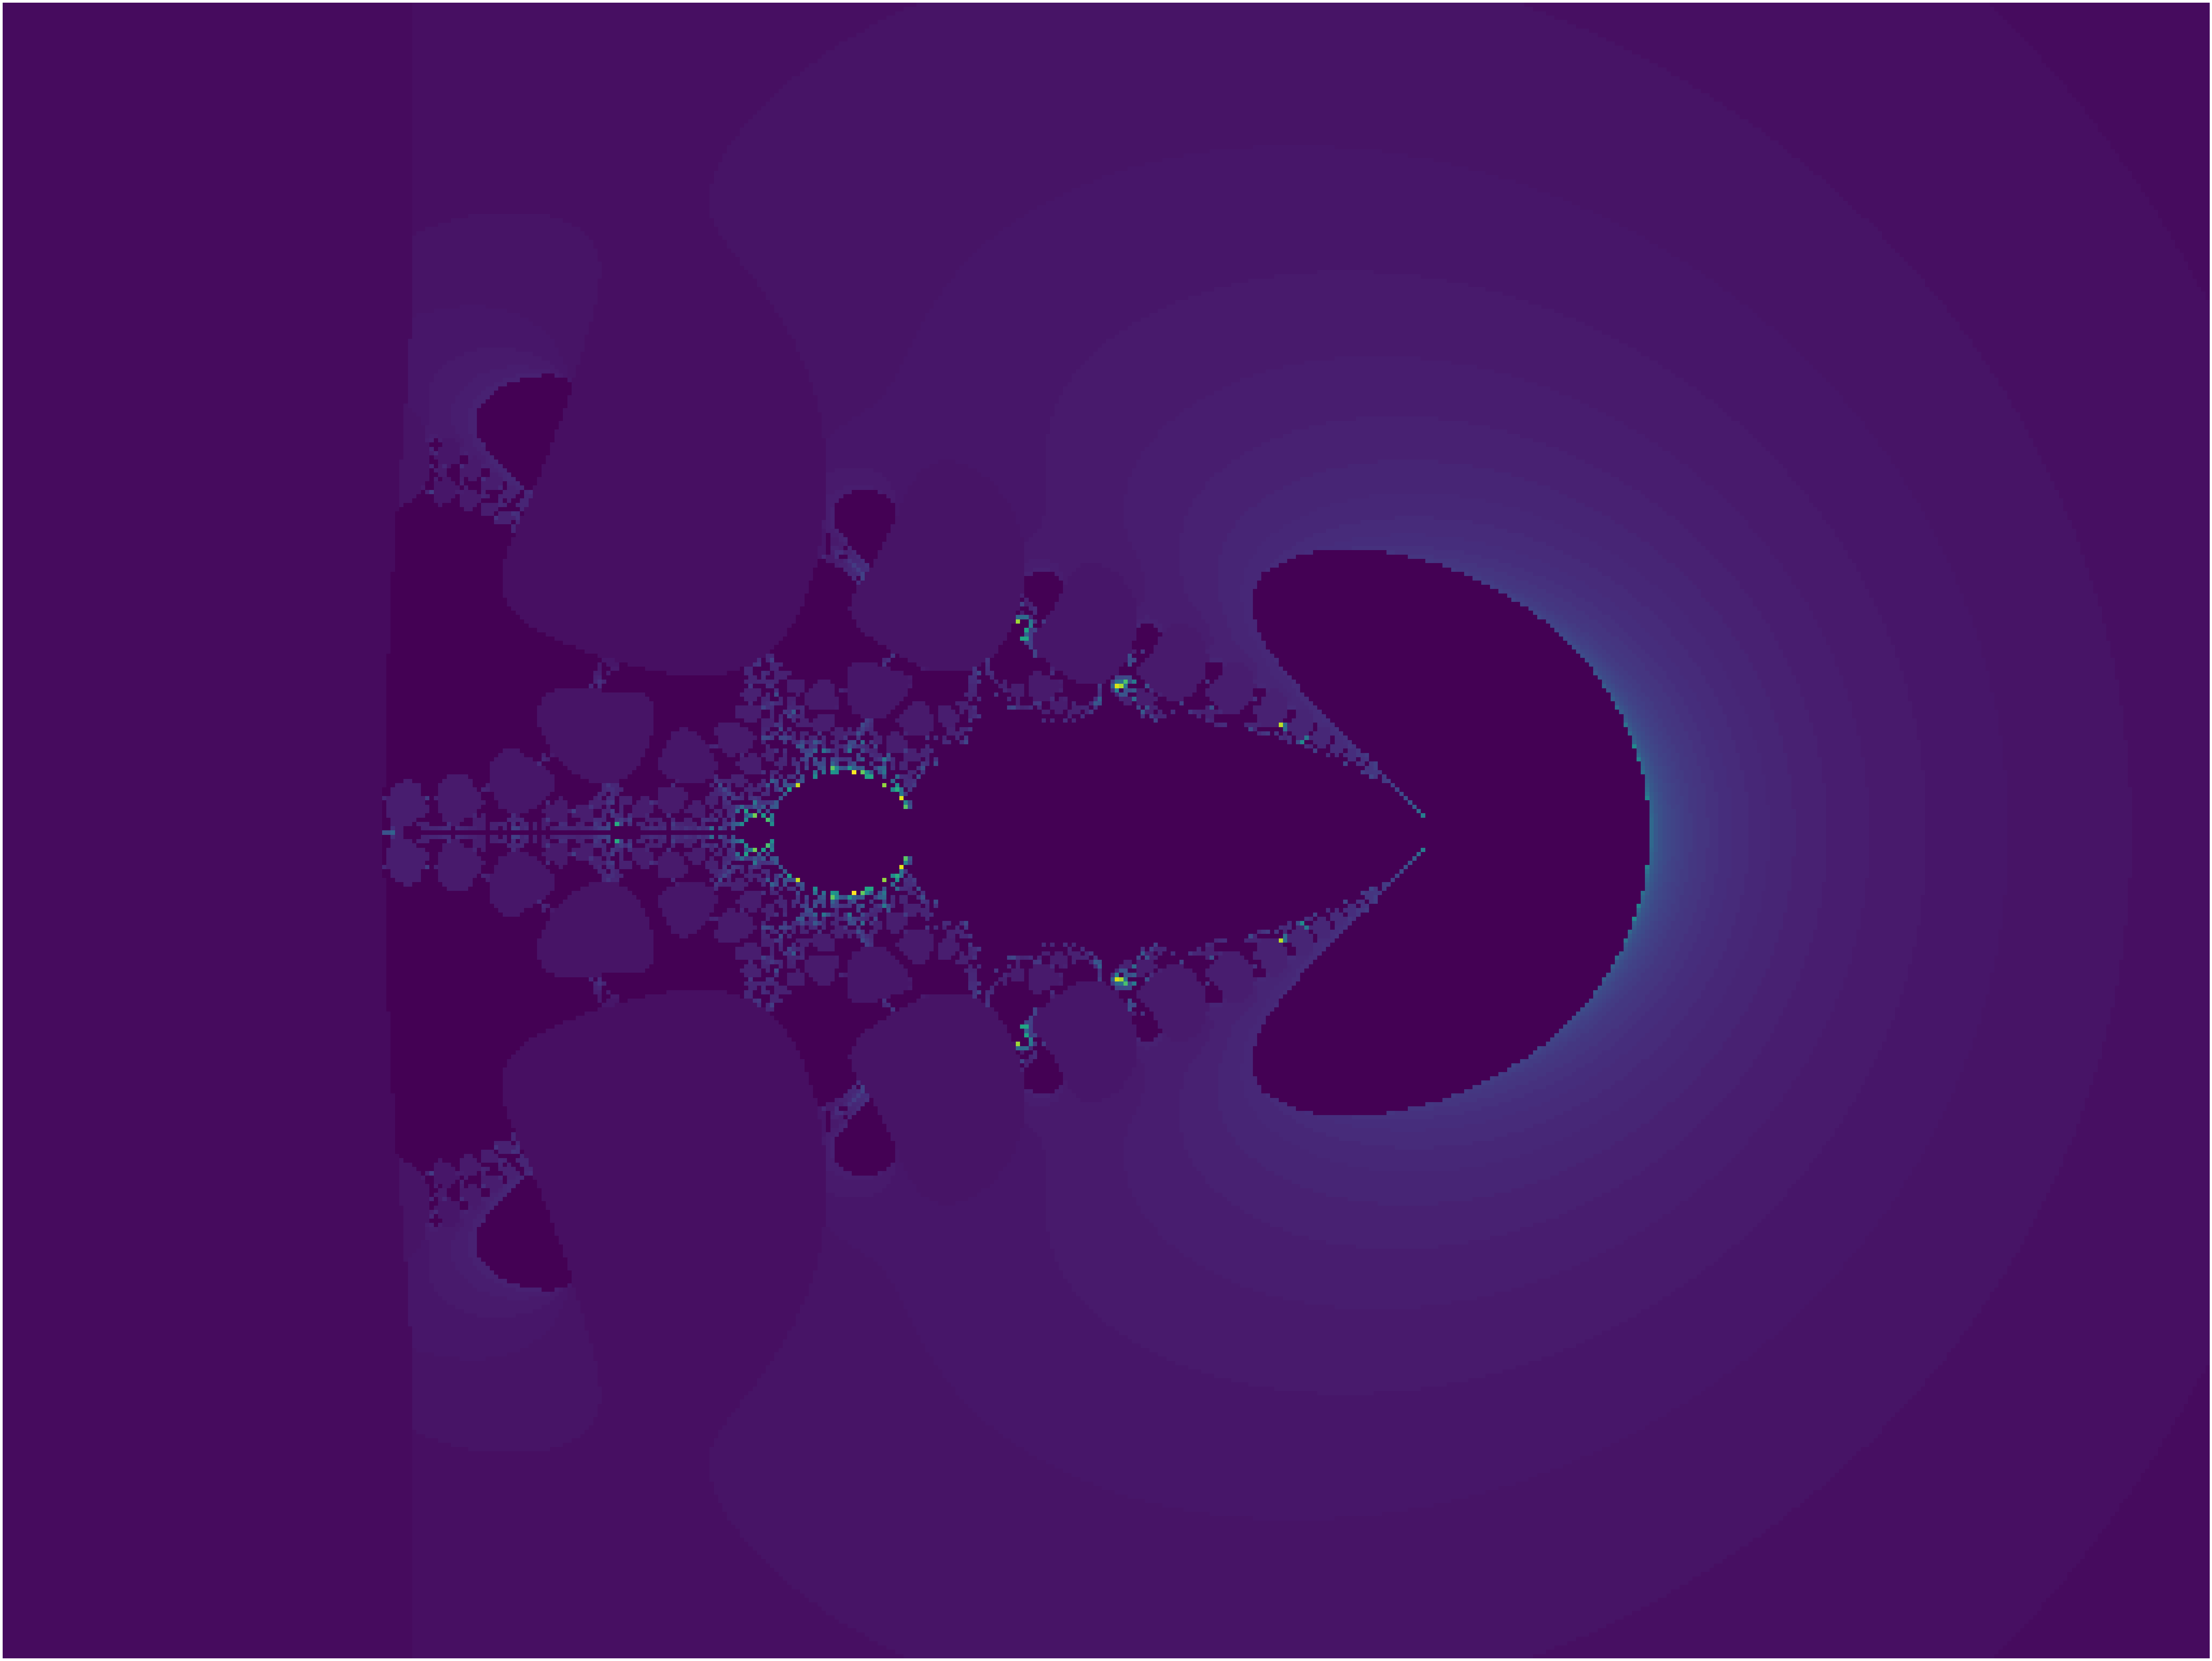

In [67]:
def dick_pt(c, max_iterations=100):
    
    iter = 0
    z = 1
    
    while (iter < max_iterations):

        # ----FRACTAL EQUATION STARTS----
        z = z - ((z-1)**3)/(3*(z**2)) + c
        # ----FRACTAL EQUATION ENDS  ----        
        
        iter += 1
        if abs(z) > 2.0:
            break
    
    return iter if iter!=max_iterations else 0

def dick(width, height, zmin, zmax):
    
    def map_pos(i, j):
        return zmin + j*(zmax-zmin).real/width + i*(zmax-zmin).imag/height*1j
    
    return [[dick_pt(map_pos(i,j)) for j in range(width)] for i in range(height)]

(width, height) = (2048, 1536)
(zmin, zmax) = (-2.2-1.5j, +1.2+1.5j)

dick = dick(int(width/4), int(height/4), zmin/4, zmax/4)

plt.figure(figsize=(128,80))
plt.axis('off')
plt.imshow(dick)

## APPENDIX 2: OLD NOVA FRACTAL

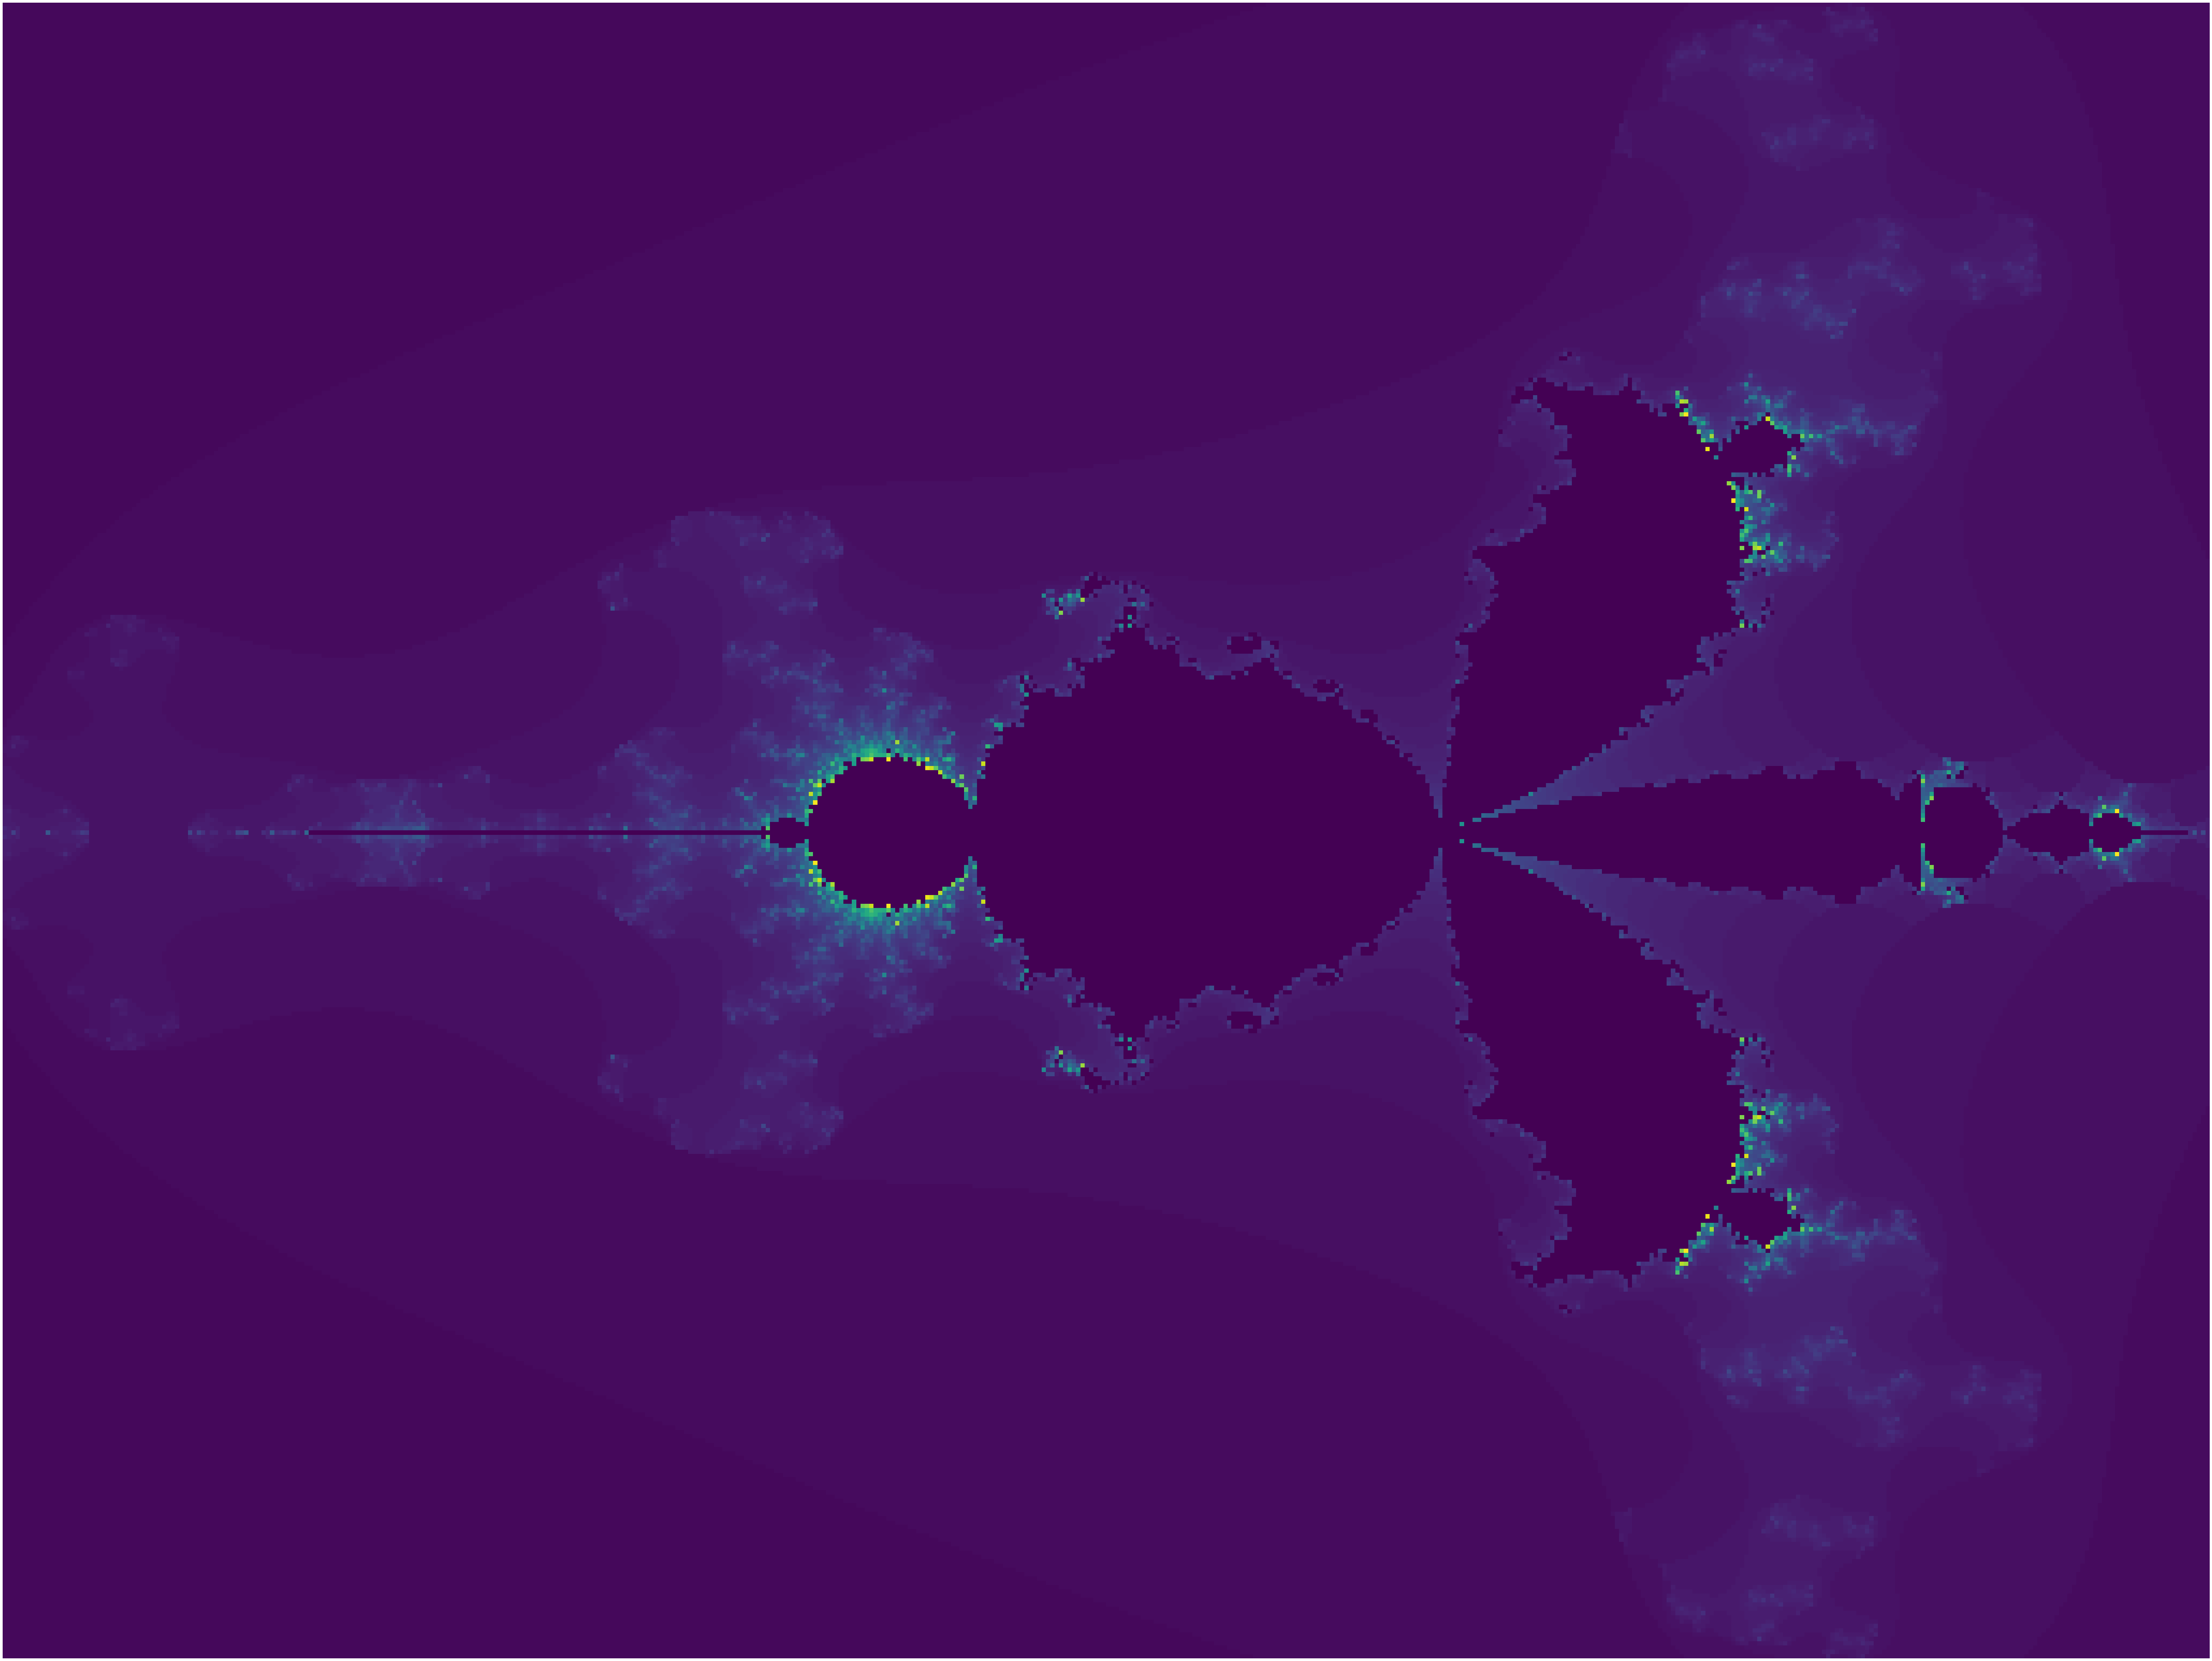

In [26]:
def nova_pt(c, max_iterations=100):
    
    iter = 0
    z = 0
    
    while (iter < max_iterations):

        # ----FRACTAL EQUATION STARTS----
        z = z - ((z-1)**3)/3*(z**2) + c
        # ----FRACTAL EQUATION ENDS  ----        
        
        iter += 1
        if abs(z) > 2.0:
            break
    
    return iter if iter!=max_iterations else 0

def nova(width, height, zmin, zmax):
    
    def map_pos(i, j):
        return zmin + j*(zmax-zmin).real/width + i*(zmax-zmin).imag/height*1j
    
    return [[nova_pt(map_pos(i,j)) for j in range(width)] for i in range(height)]

(width, height) = (1024, 768)
(zmin, zmax) = (-2.2-1.5j, +1.2+1.5j)

nova = nova(int(width/2), int(height/2), zmin/2, zmax/2)

plt.figure(figsize=(128,80))
plt.axis('off')
plt.imshow(nova)

## APPENDIX 3: NEWTON FRACTAL

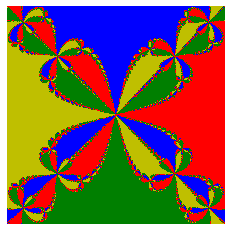

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# A list of colors to distinguish the roots.
colors = ['b', 'r', 'g', 'y']

TOL = 1.e-8

def newton(z0, f, fprime, MAX_IT=1000):
    """The Newton-Raphson method applied to f(z).

    Returns the root found, starting with an initial guess, z0, or False
    if no convergence to tolerance TOL was reached within MAX_IT iterations.

    """

    z = z0
    for i in range(MAX_IT):
        dz = f(z)/fprime(z)
        if abs(dz) < TOL:
            return z
        z -= dz
    return False

def plot_newton_fractal(f, fprime, n=200, domain=(-1, 1, -1, 1)):
    """Plot a Newton Fractal by finding the roots of f(z).

    The domain used for the fractal image is the region of the complex plane
    (xmin, xmax, ymin, ymax) where z = x + iy, discretized into n values along
    each axis.

    """

    roots = []
    m = np.zeros((n, n))

    def get_root_index(roots, r):
        """Get the index of r in the list roots.

        If r is not in roots, append it to the list.

        """

        try:
            return np.where(np.isclose(roots, r, atol=TOL))[0][0]
        except IndexError:
            roots.append(r)
            return len(roots) - 1

    xmin, xmax, ymin, ymax = domain
    for ix, x in enumerate(np.linspace(xmin, xmax, n)):
        for iy, y in enumerate(np.linspace(ymin, ymax, n)):
            z0 = x + y*1j
            r = newton(z0, f, fprime)
            if r is not False:
                ir = get_root_index(roots, r)
                m[iy, ix] = ir
    nroots = len(roots)
    if nroots > len(colors):
        # Use a "continuous" colormap if there are too many roots.
        cmap = 'hsv'
    else:
        # Use a list of colors for the colormap: one for each root.
        cmap = ListedColormap(colors[:nroots])
    plt.imshow(m, cmap=cmap, origin='lower')
    plt.axis('off')
    plt.show()

f = lambda z: z**4 - 1
fprime = lambda z: 4*z**3

plot_newton_fractal(f, fprime, n=500)